In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import plotly.graph_objects as go

In [2]:
accounts = pd.read_csv('twm_accounts.csv', sep = ';')
checking_acct = pd.read_csv('twm_checking_acct.csv', sep = ';')
checking_tran = pd.read_csv('twm_checking_tran.csv', sep = ';')
credit_acct = pd.read_csv('twm_credit_acct.csv', sep = ';')
credit_tran = pd.read_csv('twm_credit_tran.csv', sep = ';')
customer = pd.read_csv('twm_customer.csv')
savings_acct = pd.read_csv('twm_savings_acct.csv', sep = ';')
savings_tran = pd.read_csv('twm_savings_tran.csv', sep = ';')
transaction = pd.read_csv('twm_transactions.csv', sep = ';')

In [3]:
customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [4]:
bins = [0, 20, 40, 60, 80, 100]
labels = [1,2,3,4,5]
customer['age_bin'] = pd.cut(customer['age'], bins=bins, labels=labels)
customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,age_bin
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,3
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,4
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,2
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,3
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,2
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,3
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,3
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,2


In [5]:
min_income = customer['income'].min()
print(min_income)
max_income = customer['income'].max()
print(max_income)

0
144157


In [6]:
bins = [0, 15000, 30000, 45000, 60000, 75000, 90000, 105000, 120000, 135000, 150000]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
customer['income_bin'] = pd.cut(customer['income'], bins=bins, labels=labels, include_lowest =True)
customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,age_bin,income_bin
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,3,1
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,4,0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,2,1
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,3,3
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,2,0
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,3,1
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,3,4
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,2,1


In [7]:
gender = pd.get_dummies(customer["gender"])
customer = pd.concat([customer, gender], axis = 1)
customer.head(15)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,age_bin,income_bin,F,M
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,3,1,0,1
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,4,0,0,1
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,2,1,1,0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,3,3,1,0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,3,2,1,0
5,1362813,15684,53,3,2,F,2,,Terry ...,Eubanks ...,6999,Begonia ...,60654,Chicago,IL,3,1,1,0
6,1363017,0,16,1,0,M,1,,Tim ...,McMillen ...,10274,Mission Gorge ...,90095,Los Angeles,CA,1,0,0,1
7,1362609,1929,79,8,0,F,2,,Sandy ...,Rayhanian ...,6168,Camellia ...,96846,Honolulu,HI,4,0,1,0
8,1363486,39942,41,1,5,F,4,,Jill ...,Campbell ...,3830,Tenth ...,96802,Honolulu,HI,3,2,1,0
9,1363078,9622,46,6,1,M,2,Mr.,Christopher ...,McVicker ...,14382,Peach ...,96822,Honolulu,HI,3,0,0,1


In [8]:
customer = customer.drop(['income', 'age', 'years_with_bank', 'gender', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 'postal_code', 'city_name'], axis = 1)

In [9]:
customer = customer.drop(['state_code', 'cust_id'], axis =1)

In [10]:
customer

,nbr_children,marital_status,age_bin,income_bin,F,M
0,1,2,3,1,0,1
1,0,2,4,0,0,1
2,0,1,2,1,1,0
3,0,1,3,3,1,0
4,2,4,3,2,1,0
...,...,...,...,...,...,...
742,1,4,2,0,1,0
743,1,2,3,1,0,1
744,2,2,3,4,0,1
745,0,2,2,1,1,0


In [11]:
# import MiMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
# initialize scaler
scaler = MinMaxScaler()
# scaling features
customer_scaled = pd.DataFrame(scaler.fit_transform(customer), columns = customer.columns)
customer_scaled

,nbr_children,marital_status,age_bin,income_bin,F,M
0,0.2,0.333333,0.50,0.111111,0.0,1.0
1,0.0,0.333333,0.75,0.000000,0.0,1.0
2,0.0,0.000000,0.25,0.111111,1.0,0.0
3,0.0,0.000000,0.50,0.333333,1.0,0.0
4,0.4,1.000000,0.50,0.222222,1.0,0.0
...,...,...,...,...,...,...
742,0.2,1.000000,0.25,0.000000,1.0,0.0
743,0.2,0.333333,0.50,0.111111,0.0,1.0
744,0.4,0.333333,0.50,0.444444,0.0,1.0
745,0.0,0.333333,0.25,0.111111,1.0,0.0


In [13]:
# import Kmeans 
from sklearn.cluster import KMeans

# import matplotlib
import matplotlib.pyplot as plt

In [14]:
# elbow rule
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


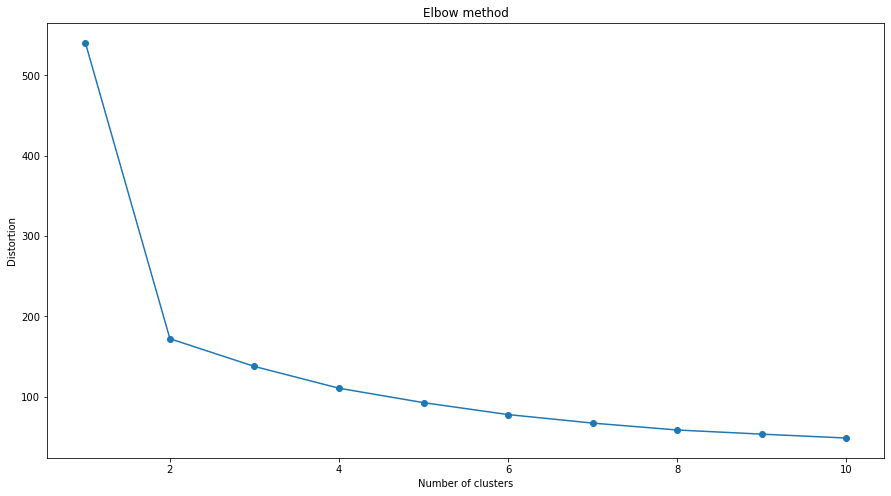

In [15]:
plot_inertia(customer_scaled)

In [16]:
# assign cluster to customers
customer_scaled['cluster'] = KMeans(n_clusters=4, n_init=10).fit_predict(customer_scaled)

In [17]:
# clusters size
customer_scaled['cluster'].value_counts()

2    250
0    211
1    168
3    118
Name: cluster, dtype: int64

In [18]:
# data to radar chart
df_radar = customer_scaled.groupby('cluster').mean().divide(customer_scaled.drop('cluster',axis=1).mean())
# explore data
df_radar.head()

,nbr_children,marital_status,age_bin,income_bin,F,M
cluster,,,,,,
0,1.584509,1.504218,1.334509,1.546684,0.000000,2.270517
1,0.000000,0.067472,0.574106,0.528289,1.787081,0.000000
2,1.650674,1.627757,1.276503,1.016955,1.787081,0.000000
3,0.000000,0.096062,0.422400,0.658122,0.000000,2.270517


In [19]:
# import plotly
import plotly.graph_objects as go

In [20]:
# function that plots radar chart
def plot_radarchart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster{df.index[i]}',
                                    fill = 'toself'))


    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

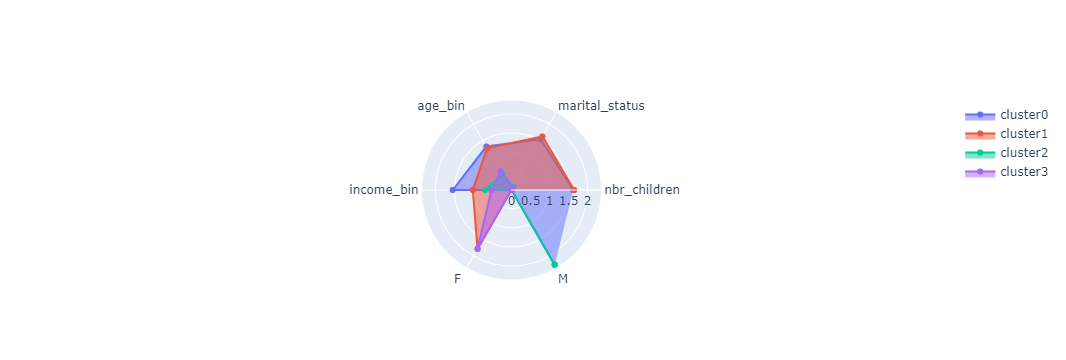

In [47]:
plot_radarchart(df_radar)